## Imports

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os                                                                       
import numpy as np                                                              
import tensorflow as tf                                                         
import data.data_selector as ds                                                   
import utils.plot_functions as pf                                               
import analysis.analysis_picker as ap

In [3]:
analysis_params = {
  "model_type": "lca",
  "model_name": "lca_vh_ft_white",
  "data_type": "vanHateren",
  "num_patches": 1e4,
  "device": "/gpu:0",
  "version": "0.0",
  "num_inference_images": 5, #How many random images to average over for inference statistics
  "clobber": True}

# Computed params
analysis_params["model_dir"] = (os.path.expanduser("~")+"/Work/Projects/"
  +analysis_params["model_name"])

In [4]:
analyzer = ap.get_analyzer(analysis_params)

In [5]:
analyzer.model_params["data_type"] = analysis_params["data_type"]
analyzer.model_params["num_patches"] = analysis_params["num_patches"]
data = ds.get_data(analyzer.model_params)
data = analyzer.model.preprocess_dataset(data)
data = analyzer.model.reshape_dataset(data)
analyzer.model_params["input_shape"] = [
  data["train"].num_rows*data["train"].num_cols*data["train"].num_channels]

In [6]:
if analysis_params["clobber"]:
  analyzer.run_analysis(data["train"].images, save_info="full_imgs")
else:
  analyzer.load_analysis(save_info="full_imgs")

INFO:tensorflow:Restoring parameters from /home/dpaiton/Work/Projects/lca_vh_ft_white/checkpoints/lca_vh_ft_white_v0.0_weights-1000000
INFO:tensorflow:Restoring parameters from /home/dpaiton/Work/Projects/lca_vh_ft_white/checkpoints/lca_vh_ft_white_v0.0_weights-1000000


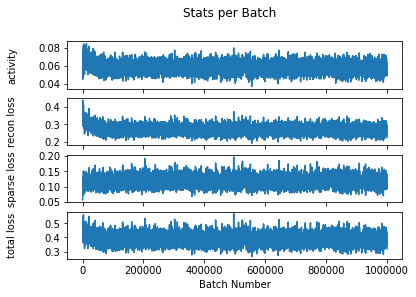

In [7]:
stats_fig = pf.plot_stats(analyzer.run_stats,
  keys=["a_fraction_active", "recon_loss", "sparse_loss", "total_loss"],
  labels=["activity", "recon loss", "sparse loss", "total loss"])

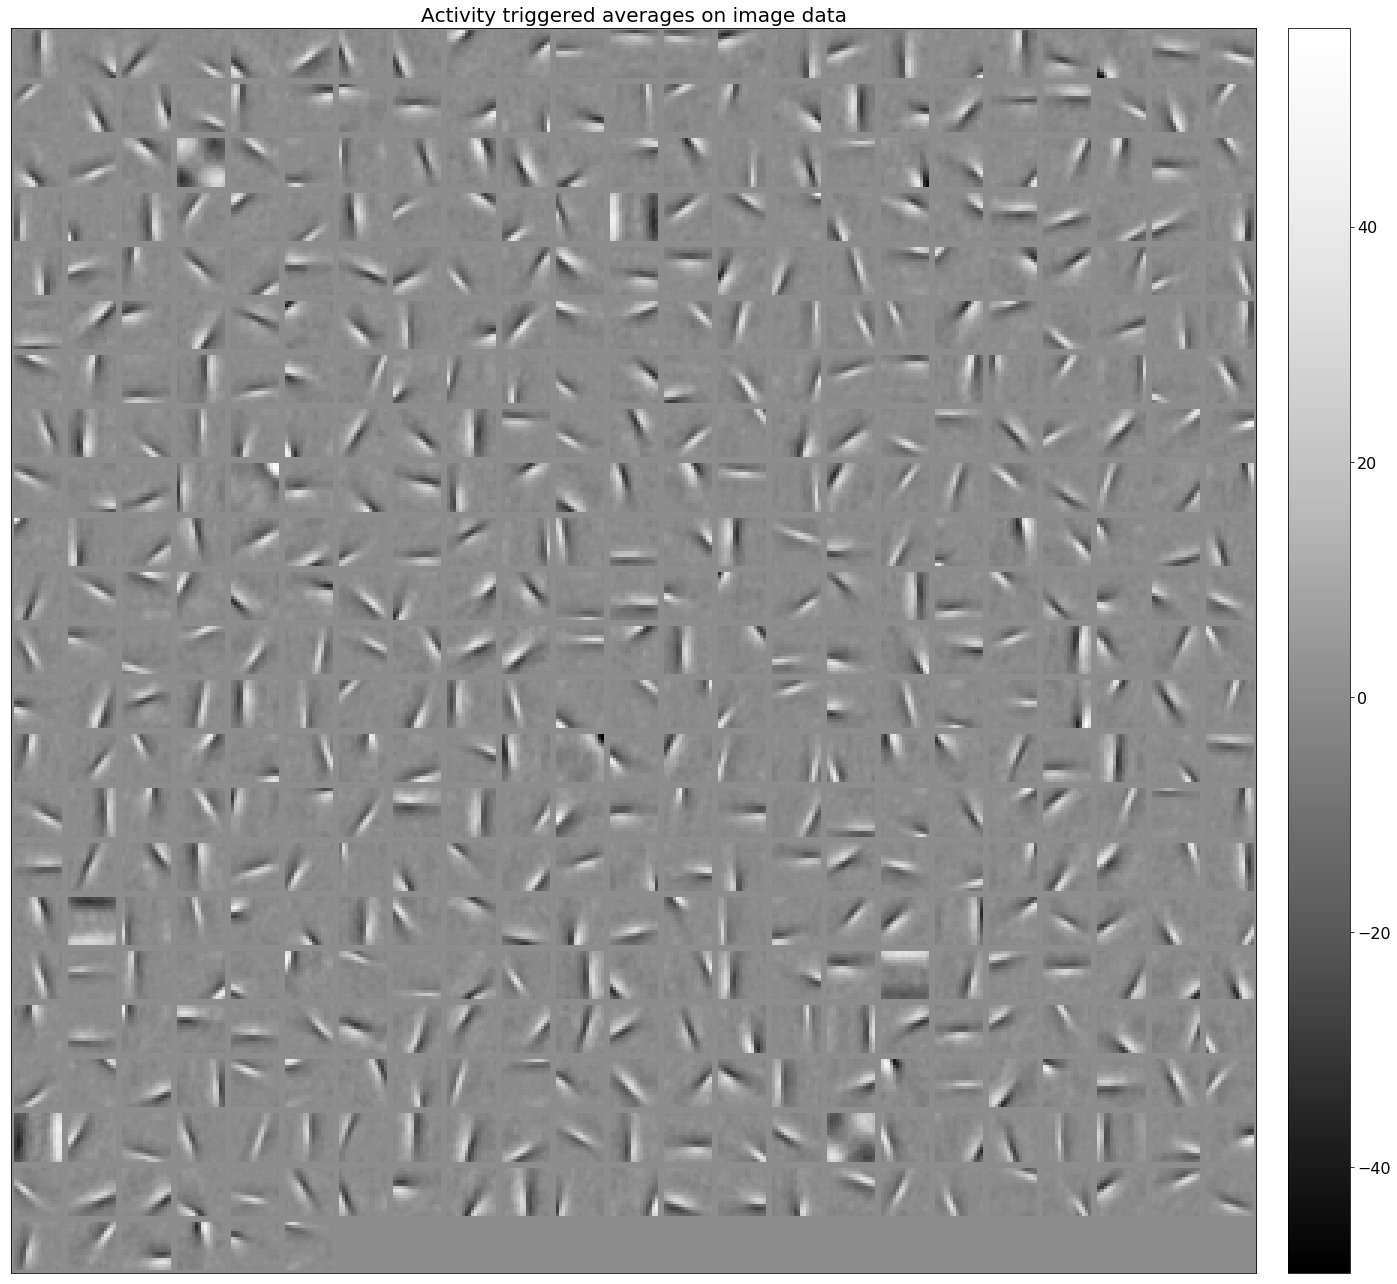

In [8]:
num_pixels, num_neurons = analyzer.atas.shape
atas_fig = pf.plot_data_tiled(analyzer.atas.T.reshape(num_neurons,
  int(np.sqrt(num_pixels)), int(np.sqrt(num_pixels))), normalize=False,
  title="Activity triggered averages on image data")

INFO:tensorflow:Restoring parameters from /home/dpaiton/Work/Projects/lca_vh_ft_white/checkpoints/lca_vh_ft_white_v0.0_weights-1000000


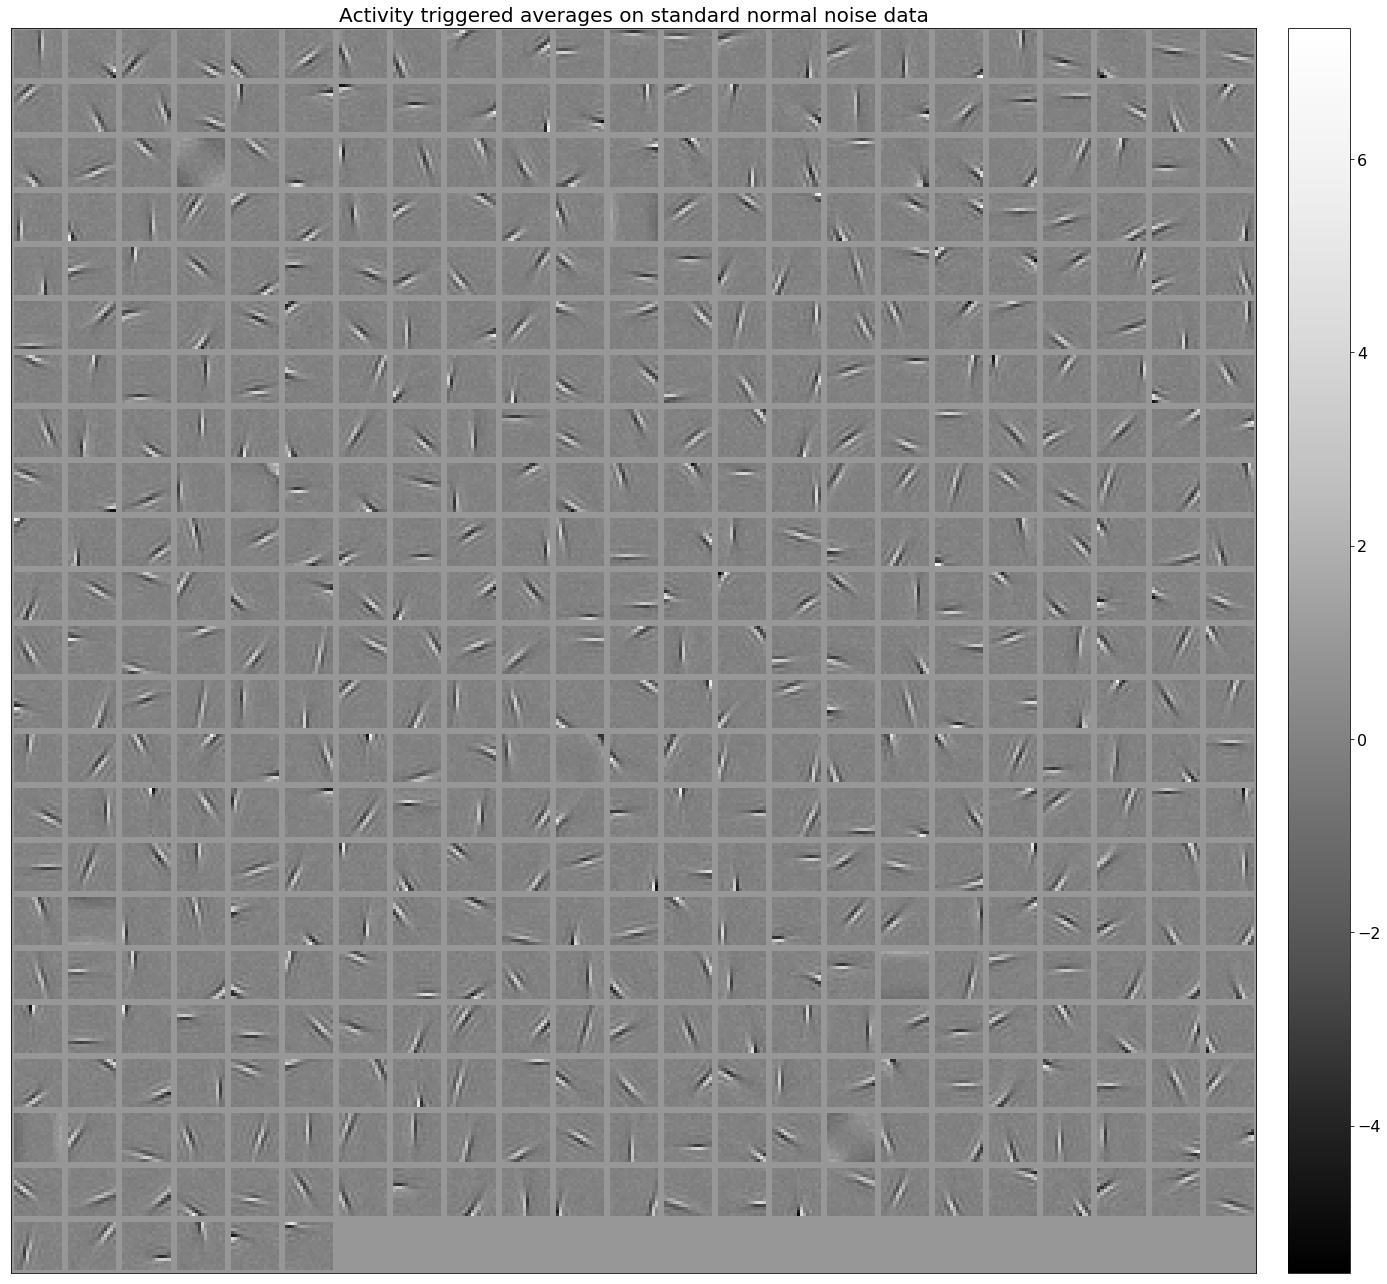

In [9]:
noise_images = np.random.standard_normal(data["train"].images.shape) 
noise_evals = analyzer.evaluate_model(noise_images, analyzer.var_names)
noise_atas = analyzer.compute_atas(noise_evals["inference/activity:0"],
  noise_images)
noise_atas_fig = pf.plot_data_tiled(noise_atas.T.reshape(num_neurons,
  int(np.sqrt(num_pixels)), int(np.sqrt(num_pixels))), normalize=False,
  title="Activity triggered averages on standard normal noise data")

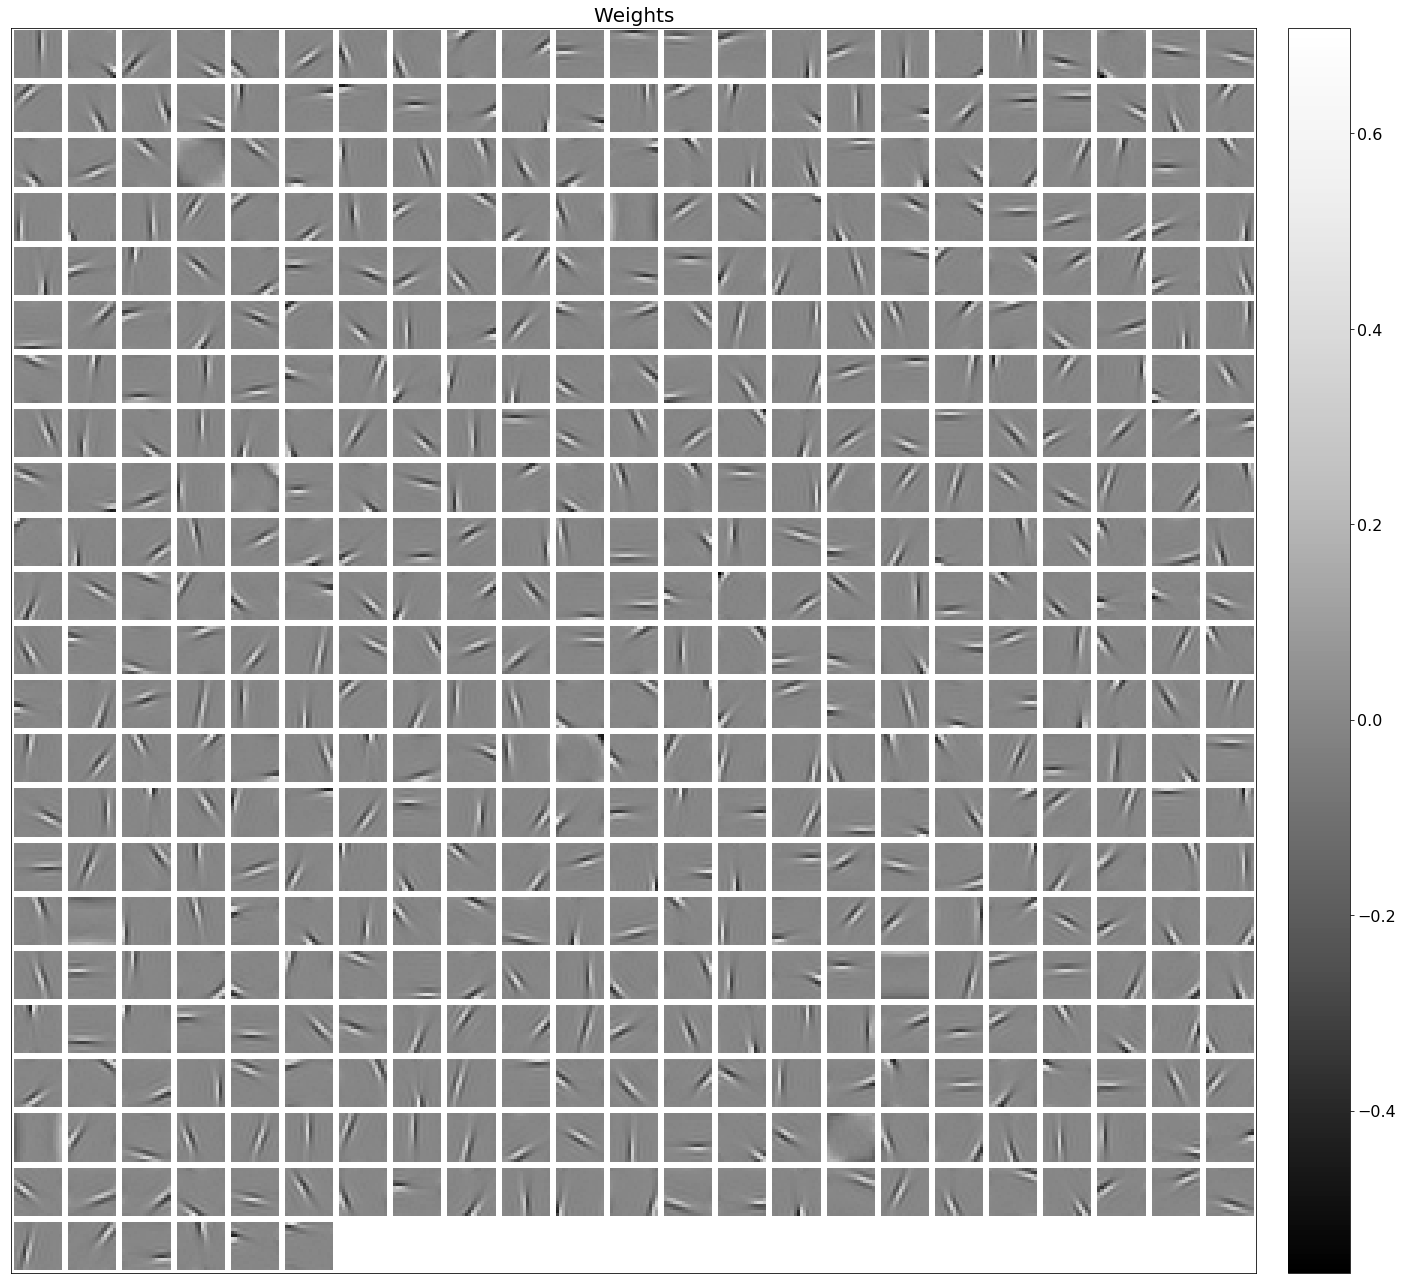

In [10]:
dict_fig = pf.plot_data_tiled(analyzer.evals["weights/phi:0"].T.reshape(analyzer.model.num_neurons,
  data["train"].num_cols, data["train"].num_rows), normalize=False, title="Weights")

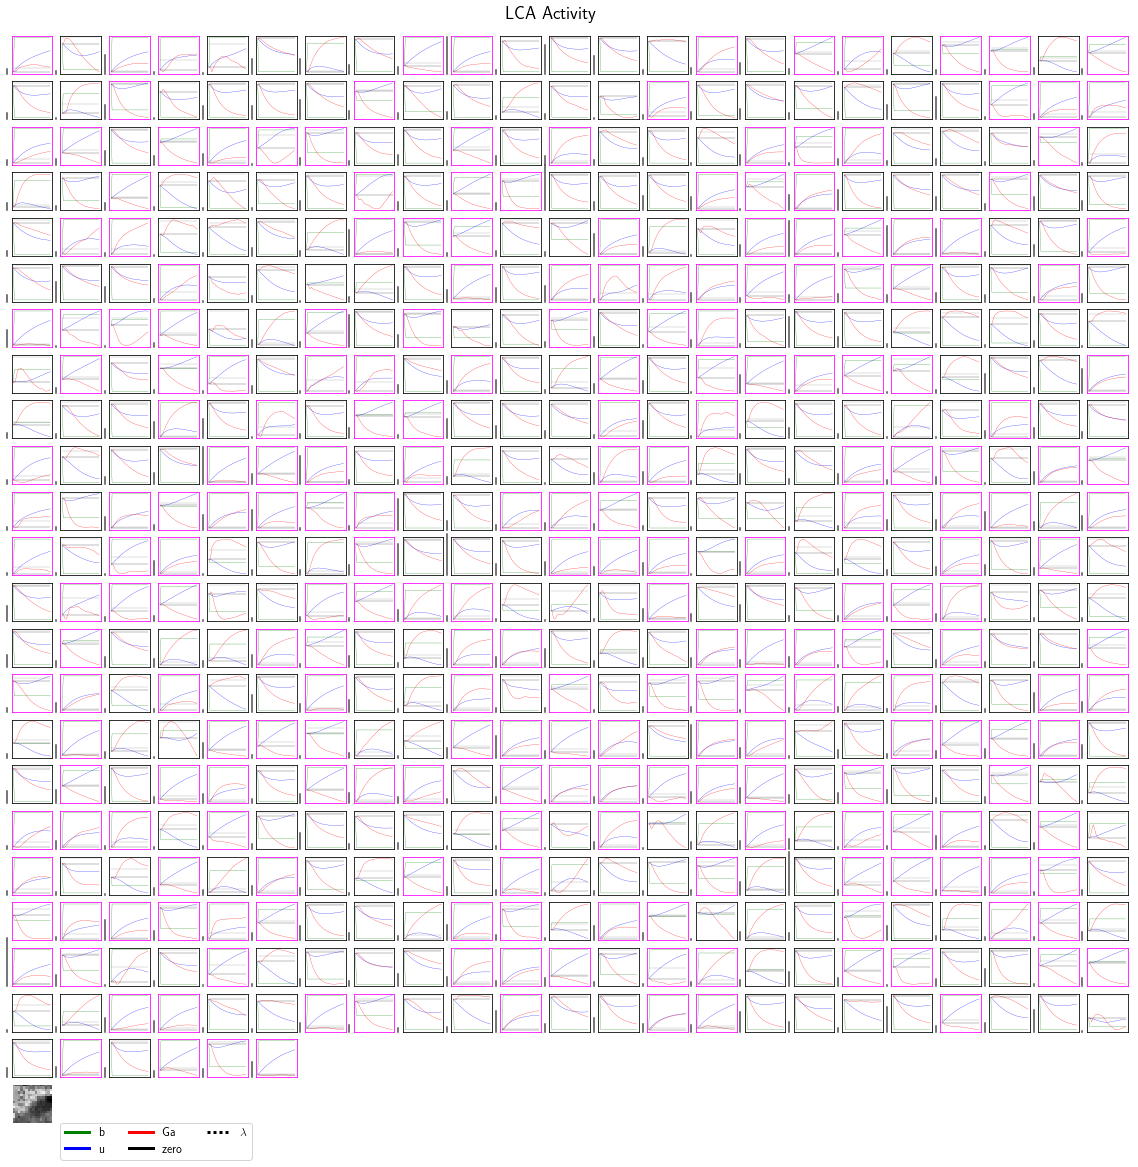

In [11]:
inference_fig = pf.plot_inference_traces(analyzer.inference_stats, analyzer.model_schedule[0]["sparse_mult"])

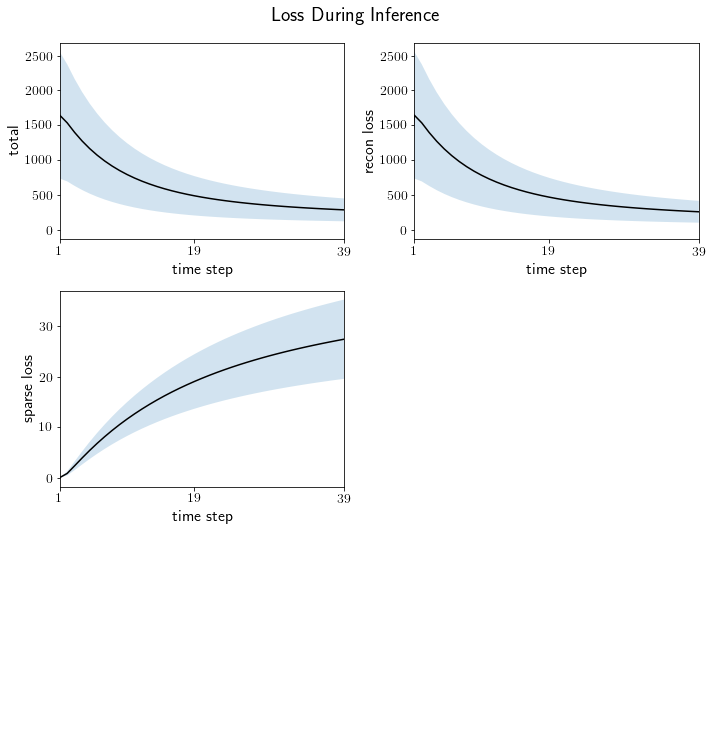

In [12]:
fig = pf.plot_inference_stats(analyzer.inference_stats, title="Loss During Inference")